# Model Building and Model Evaluation
- In the we will build the model that predciets the salary of Data Sceince 

Steps : 
1. Fearue Selection - Select the feature which we require or which are important accept for the model
2. Dummies - Converting the Categorical attributs into One hot encoding(vector - 0,1)
2. Spliting Dataset - Seperate the data into train and test data(train is use for building the model and test for prediction making)
3. Building Model - In the pase we will build various Artificial Nueral Network
4. Model Evaluation - Checking the Error rate of model preformed by various ways. 

In [1]:
#Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [2]:
df = pd.read_csv('eda_data.csv')
df.head()

,Unnamed: 0,Title,Location,Company,Rating,Ownership,Industry,Sector,Salary,Description,...,Excel,Deep_learning,Macine_learning,Bachelors,Masters,Job_type,Job_simp,Seniority_simp,Industry_simp,Sectors_simp
0,0,Data Scientist 1,Bangalore,PayPal,4.1,Company - Public,Internet,Information Technology,₹250K - ₹683K (Glassdoor Est.),Who we are: Fueled by a fundamental belief tha...,...,1,1,1,1,1,Other,Data Scientist,Other,Internet,Information Technology
1,1,Data Scientist,Gurgaon,Builder.ai - What would you Build?,3.7,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹527K - ₹798K (Glassdoor Est.),About us\n\nInnovation is fuelled by the power...,...,0,1,1,0,1,Other,Data Scientist,Other,Software,Information Technology
2,2,Machine Learning Engineer - Java/Scala/Spark (...,Bangalore,Oracle,3.8,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹402K - ₹831K (Glassdoor Est.),Oracle Cloud Infrastructure (OCI) is a strateg...,...,1,1,1,0,1,Internship,Machine Learing,Other,Software,Information Technology
3,3,Data Scientist,Bangalore,Nutanix,3.9,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹457K - ₹899K (Glassdoor Est.),We are looking for a Data Scientist who will s...,...,1,0,1,0,1,Other,Data Scientist,Other,Software,Information Technology
4,4,Data Scientist,Chennai,Paypal,4.1,Company - Public,Internet,Information Technology,₹540K - ₹724K (Glassdoor Est.),"At PayPal, were literally reinventing how the ...",...,0,1,1,0,1,Other,Data Scientist,Other,Internet,Information Technology


In [3]:
df.columns

Index(['Unnamed: 0', 'Title', 'Location', 'Company', 'Rating', 'Ownership',
       'Industry', 'Sector', 'Salary', 'Description', 'min_salary',
       'max_salary', 'avg_salary', 'Type_of_ownership', 'Python', 'Aws',
       'Excel', 'Deep_learning', 'Macine_learning', 'Bachelors', 'Masters',
       'Job_type', 'Job_simp', 'Seniority_simp', 'Industry_simp',
       'Sectors_simp'],
      dtype='object')

In [4]:
# Droping the unwanted Data
df.drop(['Unnamed: 0', 'Title', 'Company', 'Ownership', 'Industry', 'Sector', 'Salary', 'Description', 'min_salary', 'max_salary'], inplace = True, axis = 1)

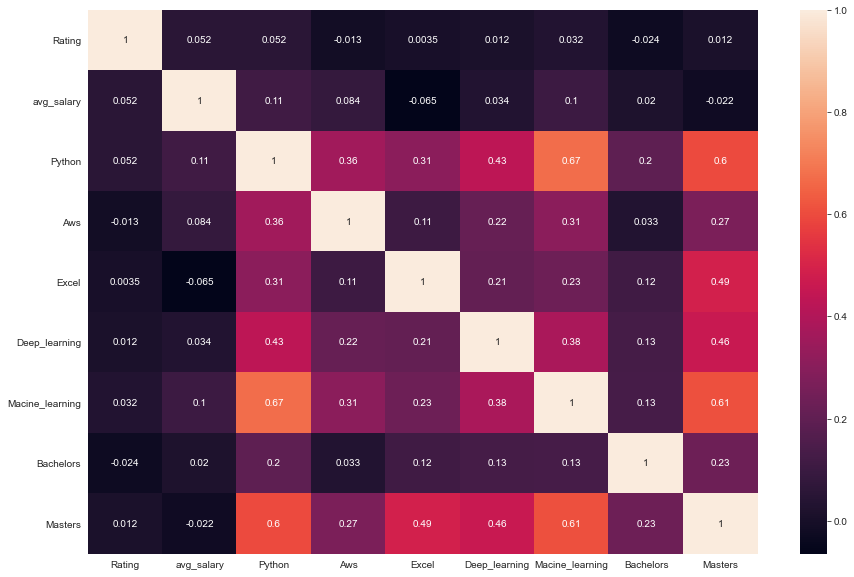

In [5]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.show()

## Feature Selection

In [6]:
# Function for selection of important feature using Correlation method
def feaure_selection(dataset, threshold):
    corr_set = set()
    corr_matrix = dataset.corr()  # Correlation of data
    # Itterating to each columns
    for i in range(len(corr_matrix.columns)):
        # Looping to each columns rows 
        for j in range(i):                             
              if corr_matrix.iloc[i, j] > threshold:  # If correlation is greater then the Threshold
                    corr_ = corr_matrix.columns[i]    # we will select that feature if statement is True
                    corr_set.add(corr_)               # Storing features into the set 
    return corr_set

In [7]:
# If the feature is greater then 0.80 we will drop the feature
feaure_selection(df, 0.80)

set()

## Converting Cateforical features into numerical values

In [8]:
df_dum= pd.get_dummies(df, drop_first=True)

In [9]:
df_dum.shape

(586, 38)

In [10]:
df_dum.head()

,Rating,avg_salary,Python,Aws,Excel,Deep_learning,Macine_learning,Bachelors,Masters,Location_Chennai,...,Industry_simp_Internet,Industry_simp_Manufacturing,Industry_simp_Other,Industry_simp_Service,Industry_simp_Software,Sectors_simp_Health Care,Sectors_simp_Information Technology,Sectors_simp_Manufacturing,Sectors_simp_Other,Sectors_simp_Services
0,4.1,466.5,1,0,1,1,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
1,3.7,662.5,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,3.8,616.5,1,1,1,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,3.9,678.0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,4.1,632.0,1,0,0,1,1,0,1,1,...,1,0,0,0,0,0,1,0,0,0


## Taking X as Independent Variable and y as Dependent Variable

In [11]:
X = df_dum.drop('avg_salary', axis =1)    #Independent Variables
y = df_dum.avg_salary.values              #Dependent Variables 

## Spliting Data into Train/Test

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size =0.2, random_state=0)
print("Training Data Set : " ,X_train.shape,y_train.shape)
print("Testing Data Set : " ,X_test.shape,y_test.shape)

Training Data Set :  (468, 37) (468,)
Testing Data Set :  (118, 37) (118,)


## Scaling Data 

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Building 

### Artificial Neuran Network

Sequential -  Keeps all the Layers in Sequence through out the training

Dense Layer : It is the Hidden Layers of Neural Network 
- units -  Total neurals 
- kernel_initializer -  Weight Initialization Method
- activation -  Activation Function 
- input_dim - Dimension of the input Features

Compile :
- optimizer - It is used to change the attributes of the neural network such as weights, bies and learning rate to reduce the losses. Optimizers Initialization are (Gradiant, SGD, Mini Batch SGD, Adagrad, Adadelta, Adam)
- loss - Calculating the error (Mean Squared Error(MSE))

In [14]:
# Model Building

model = Sequential()
model.add(Dense(units = 12, kernel_initializer = 'he_uniform', kernel_regularizer=regularizers.l2(0.01), activation = 'relu', input_dim = 37))
model.add(Dense(units = 12, kernel_initializer = 'he_uniform', kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
model.add(Dense(units = 24, kernel_initializer = 'he_uniform', kernel_regularizer=regularizers.l2(0.01),activation = 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units = 32, kernel_initializer = 'he_uniform',kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'he_uniform',kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, kernel_initializer = 'normal'))
model.compile(optimizer = 'adam', loss='mae', metrics=['mae'])

In [15]:
# Summary of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                456       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                800       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [16]:
# Stops Early if the val_loss is not Decreasing
early_stop = EarlyStopping(monitor = 'val_loss', patience = 25) # Parience - Wait till the 5 iteration

## Training Model
- batch_size = Some size of data from the dataset for per epoch
- epoch - Number of epochs to train the model. An epoch is an iteration over the entire `x` and `y` 1 epoch is 1 round of front and back propogation
- callbacks - Callback function to mointo the val_loss and stop training is it does not decrease
- validation_data - Test Data

In [17]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 110, callbacks = [early_stop], validation_data = (X_test, y_test))

Epoch 1/110
30/30 [==============================] - 0s 10ms/step - loss: 570.4465 - mae: 568.3104 - val_loss: 568.0536 - val_mae: 566.0051
Epoch 2/110
30/30 [==============================] - 0s 3ms/step - loss: 567.7875 - mae: 565.7862 - val_loss: 562.6837 - val_mae: 560.7135
Epoch 3/110
30/30 [==============================] - 0s 2ms/step - loss: 554.4929 - mae: 552.5106 - val_loss: 533.1893 - val_mae: 531.1697
Epoch 4/110
30/30 [==============================] - 0s 2ms/step - loss: 477.4279 - mae: 475.3278 - val_loss: 374.1561 - val_mae: 371.9346
Epoch 5/110
30/30 [==============================] - 0s 2ms/step - loss: 256.5006 - mae: 254.1445 - val_loss: 181.6551 - val_mae: 179.2039
Epoch 6/110
30/30 [==============================] - 0s 2ms/step - loss: 195.5808 - mae: 193.1721 - val_loss: 162.8182 - val_mae: 160.4295
Epoch 7/110
30/30 [==============================] - 0s 2ms/step - loss: 174.2614 - mae: 171.8813 - val_loss: 157.9865 - val_mae: 155.6298
Epoch 8/110
30/30 [=======

30/30 [==============================] - 0s 2ms/step - loss: 124.7679 - mae: 122.4313 - val_loss: 121.1044 - val_mae: 118.7517
Epoch 60/110
30/30 [==============================] - 0s 2ms/step - loss: 118.6526 - mae: 116.3010 - val_loss: 124.3546 - val_mae: 122.0125
Epoch 61/110
30/30 [==============================] - 0s 2ms/step - loss: 118.4172 - mae: 116.0678 - val_loss: 126.1992 - val_mae: 123.8534
Epoch 62/110
30/30 [==============================] - 0s 2ms/step - loss: 118.3982 - mae: 116.0493 - val_loss: 121.4336 - val_mae: 119.0734
Epoch 63/110
30/30 [==============================] - 0s 2ms/step - loss: 125.5186 - mae: 123.1657 - val_loss: 122.3146 - val_mae: 119.9658
Epoch 64/110
30/30 [==============================] - 0s 2ms/step - loss: 120.8835 - mae: 118.5252 - val_loss: 124.0377 - val_mae: 121.6894
Epoch 65/110
30/30 [==============================] - 0s 2ms/step - loss: 113.4171 - mae: 111.0687 - val_loss: 121.8369 - val_mae: 119.4720
Epoch 66/110
30/30 [=============

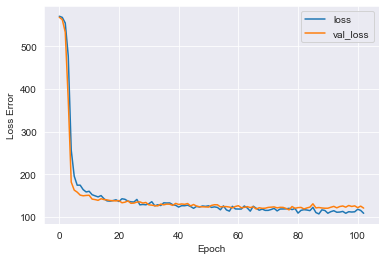

In [18]:
# plot of Loss and Validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Error')
plt.legend()
plt.show()

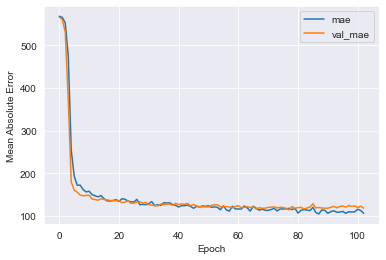

In [19]:
#p lot of mse and Validation mse
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

## Model Evaluation

In [20]:
# Calculating mean square error 
loss, mae = model.evaluate(X_train, y_train, verbose=0)
print("Training set Mean Square Error:", round(mae,2))

Training set Mean Square Error: 83.07


In [22]:
# Calculating mean square error 
loss, mae  = model.evaluate(X_test, y_test, verbose=0)
print("Testing set Mean Square Error:", round(mae,2))

Testing set Mean Square Error: 118.05


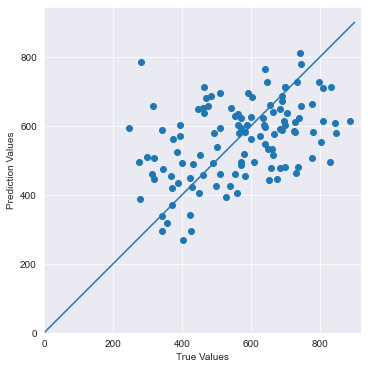

In [23]:
# Plot of True Values and Prediction Vales
y_pred = model.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Prediction Values')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0,900],[0,900])
plt.show()

Observation : 
- It seems that the model prediction did not performed well.
- The Error Rate is much high 

Note : 
- The dotes are the data and the line is the prediction best fit line if the points are on or near by the line it means the data is well predected. 
- If the data points are fare from line it means the error rate is high and the prediction is not correct

- We can imporve the prediction by adding the
